# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
任天堂
キーエンス
ファストリ
中外薬
ＮＴＴ
リクルート
三井住友ＦＧ
ＫＤＤＩ
伊藤忠
東京海上
ＳＢＧ
三菱商
ＳＢ
東エレク
三菱重
信越化
ＪＴ
みずほＦＧ
三井物
ホンダ
第一三共
武田
富士通
ＨＯＹＡ
キヤノン
三菱電
['7203', '6758', '8306', '6501', '7974', '6861', '9983', '4519', '9432', '6098', '8316', '9433', '8001', '8766', '9984', '8058', '9434', '8035', '7011', '4063', '2914', '8411', '8031', '7267', '4568', '4502', '6702', '7741', '7751', '6503']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,7974,6861,9983,4519,9432,6098,...,2914,8411,8031,7267,4568,4502,6702,7741,7751,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.988840,0.973763,0.983236,0.984000,0.994455,...,0.972455,0.992525,0.970608,1.031250,0.994916,0.994306,0.986138,0.988415,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.988193,0.979355,0.999574,0.983333,1.001085,...,0.990419,0.978256,0.975727,1.032280,0.994113,0.995401,0.964055,1.003673,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993692,0.993548,1.007387,0.992000,0.993370,...,0.993772,0.986410,0.987450,1.025412,0.996521,0.992992,0.964055,1.006782,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.991389,0.989588,0.973799,0.983656,1.000426,0.994573,0.970787,...,1.005749,0.960362,0.988415,0.973980,0.989749,0.999776,1.011334,0.998294,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.930571,0.923372,0.945819,0.947527,0.965904,0.981683,0.924312,...,0.985389,0.917554,0.940060,0.944093,0.947127,0.987690,0.955635,0.954494,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.925188,0.932049,0.936115,0.955699,0.964342,0.980326,0.940488,...,0.995928,0.917101,0.948623,0.945851,1.004316,1.009176,0.960492,0.937713,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.932992,0.951685,0.935145,0.991398,0.935502,0.968114,0.977064,...,0.986826,0.908494,0.936199,0.957103,0.966280,0.997762,0.957416,0.936291,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.872713,0.920632,0.898916,0.974194,0.941611,0.966757,0.961251,...,0.969581,0.836240,0.914876,0.934951,0.979768,1.016115,0.929080,0.893629,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.821851,0.911225,0.884522,0.965591,0.945305,0.977612,0.896910,...,0.973892,0.742242,0.890698,0.883966,0.976531,1.002014,0.909812,0.889647,0.880214,0.869797


In [7]:
summary

,7203,6758,8306,6501,7974,6861,9983,4519,9432,6098,...,2914,8411,8031,7267,4568,4502,6702,7741,7751,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.969175,0.988840,0.973763,0.983236,0.984000,0.994455,...,0.972455,0.992525,0.970608,1.031250,0.994916,0.994306,0.986138,0.988415,0.984179,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.975975,0.988193,0.979355,0.999574,0.983333,1.001085,...,0.990419,0.978256,0.975727,1.032280,0.994113,0.995401,0.964055,1.003673,0.994658,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,1.027199,0.993692,0.993548,1.007387,0.992000,0.993370,...,0.993772,0.986410,0.987450,1.025412,0.996521,0.992992,0.964055,1.006782,0.996507,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.991389,0.989588,0.973799,0.983656,1.000426,0.994573,0.970787,...,1.005749,0.960362,0.988415,0.973980,0.989749,0.999776,1.011334,0.998294,0.989727,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.930571,0.923372,0.945819,0.947527,0.965904,0.981683,0.924312,...,0.985389,0.917554,0.940060,0.944093,0.947127,0.987690,0.955635,0.954494,0.954387,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.925188,0.932049,0.936115,0.955699,0.964342,0.980326,0.940488,...,0.995928,0.917101,0.948623,0.945851,1.004316,1.009176,0.960492,0.937713,0.965276,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.932992,0.951685,0.935145,0.991398,0.935502,0.968114,0.977064,...,0.986826,0.908494,0.936199,0.957103,0.966280,0.997762,0.957416,0.936291,0.964660,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.872713,0.920632,0.898916,0.974194,0.941611,0.966757,0.961251,...,0.969581,0.836240,0.914876,0.934951,0.979768,1.016115,0.929080,0.893629,0.916992,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.821851,0.911225,0.884522,0.965591,0.945305,0.977612,0.896910,...,0.973892,0.742242,0.890698,0.883966,0.976531,1.002014,0.909812,0.889647,0.880214,0.869797


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.180850
7974    1.097817
2914    1.091976
7011    1.088634
9433    1.083299
6702    1.057642
9434    1.041863
8001    1.031622
6098    1.028247
6501    1.027449
6861    1.022158
9983    1.020860
8035    1.016876
7267    1.014768
7741    1.013083
9432    1.010176
8058    0.985647
4063    0.980304
4568    0.973024
6503    0.967148
7203    0.961490
4502    0.957923
8031    0.956179
8766    0.935864
7751    0.932402
6758    0.908619
9984    0.904750
8316    0.831337
8306    0.809502
8411    0.799547
Name: 2025-05-08 00:00:00, dtype: float64

In [12]:
list_ranking = df_ranking.index[0:16]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-05-02    1.224606
2025-05-07    1.203296
2025-05-08    1.180850
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-05-02    1.128870
2025-05-07    1.127957
2025-05-08    1.097817
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-05-02    1.074970
2025-05-07    1.078323
2025-05-08    1.091976
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-05-02    1.050621
2025-05-07    1.070568
2025-05-08    1.088634
Name: Close, dtype: float64

9433 KDDI Corporation
2025-05-02    1.056627
2025-05-07    1.081247
2025-05-08    1.083299
Name: Close, dtype: float64

6702 Fujitsu Limited
2025-05-02    1.021373
2025-05-07    1.041127
2025-05-08    1.057642
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-05-02    1.028222
2025-05-07    1.043274
2025-05-08    1.041863
Name: Close, dtype: float64

8001 ITOCHU Corporation
2025-05-02    0.985309
2025-05-07    1.019729
2025-05-08    1.031622
Name: Close, dtype: float64

6098 

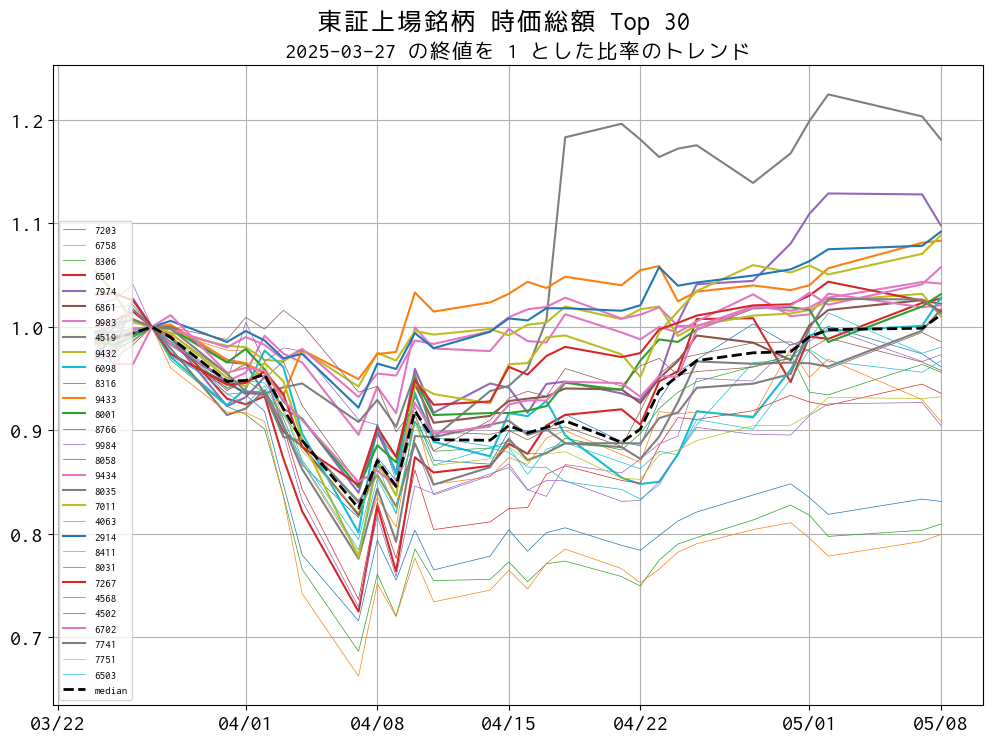

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [11]:
summary.median(axis=1)

2025-03-24    0.987860
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989738
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.953953
2025-04-03    0.920925
2025-04-04    0.890173
2025-04-07    0.824919
2025-04-08    0.870940
2025-04-09    0.846023
2025-04-10    0.918871
2025-04-11    0.890984
2025-04-14    0.890423
2025-04-15    0.904594
2025-04-16    0.897529
2025-04-17    0.902923
2025-04-18    0.909153
2025-04-21    0.888403
2025-04-22    0.901227
2025-04-23    0.938267
2025-04-24    0.952486
2025-04-25    0.967380
2025-04-28    0.974933
2025-04-30    0.976054
2025-05-01    0.990342
2025-05-02    0.997273
2025-05-07    0.998686
2025-05-08    1.011630
dtype: float64